# Final Project: Music Genre Clustering

In [1]:
import numpy as np
import scipy

import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import librosa
import librosa.display
from pyAudioAnalysis import MidTermFeatures
from pyAudioAnalysis import audioBasicIO
from IPython.display import Audio

from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

%matplotlib inline

Please do a clustering analysis on the provided sound tracks. You may use any methods for feature engineering, but the clustering methods should be limited to the methods discussed in this class. Do not hand label the tracks (it will be considered as cheating).

In [2]:
file_list = os.listdir(os.getcwd()+'/data')

audio_list = []

for file in file_list[0:90]:
    y, sr = librosa.load(os.path.join(os.getcwd()+'/data/'+file))
    audio_list.append(y)

C:\Dev\anaconda\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
C:\Dev\anaconda\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
audio_list[1]

array([-4.7336222e-11,  5.5953735e-11, -6.1092277e-11, ...,
        4.1990751e-01,  3.5352102e-01,  0.0000000e+00], dtype=float32)

In [4]:
Audio(data=audio_list[0], rate=sr)

In [2]:
features,songs,feature_names=MidTermFeatures.directory_feature_extraction("./data/", 
                                                                          mid_window=1, 
                                                                          mid_step=1,
                                                                          short_window=0.1, 
                                                                          short_step=0.05)

Analyzing file 1 of 90: ./data\0.mp3
Analyzing file 2 of 90: ./data\1.mp3
Analyzing file 3 of 90: ./data\10.mp3
Analyzing file 4 of 90: ./data\11.mp3
Analyzing file 5 of 90: ./data\12.mp3
Analyzing file 6 of 90: ./data\13.mp3
Analyzing file 7 of 90: ./data\14.mp3
Analyzing file 8 of 90: ./data\15.mp3
Analyzing file 9 of 90: ./data\16.mp3
Analyzing file 10 of 90: ./data\17.mp3
Analyzing file 11 of 90: ./data\18.mp3
Analyzing file 12 of 90: ./data\19.mp3
Analyzing file 13 of 90: ./data\2.mp3
Analyzing file 14 of 90: ./data\20.mp3
Analyzing file 15 of 90: ./data\21.mp3
Analyzing file 16 of 90: ./data\22.mp3
Analyzing file 17 of 90: ./data\23.mp3
Analyzing file 18 of 90: ./data\24.mp3
Analyzing file 19 of 90: ./data\25.mp3
Analyzing file 20 of 90: ./data\26.mp3
Analyzing file 21 of 90: ./data\27.mp3
Analyzing file 22 of 90: ./data\28.mp3
Analyzing file 23 of 90: ./data\29.mp3
Analyzing file 24 of 90: ./data\3.mp3
Analyzing file 25 of 90: ./data\30.mp3
Analyzing file 26 of 90: ./data\31.mp3

In [3]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

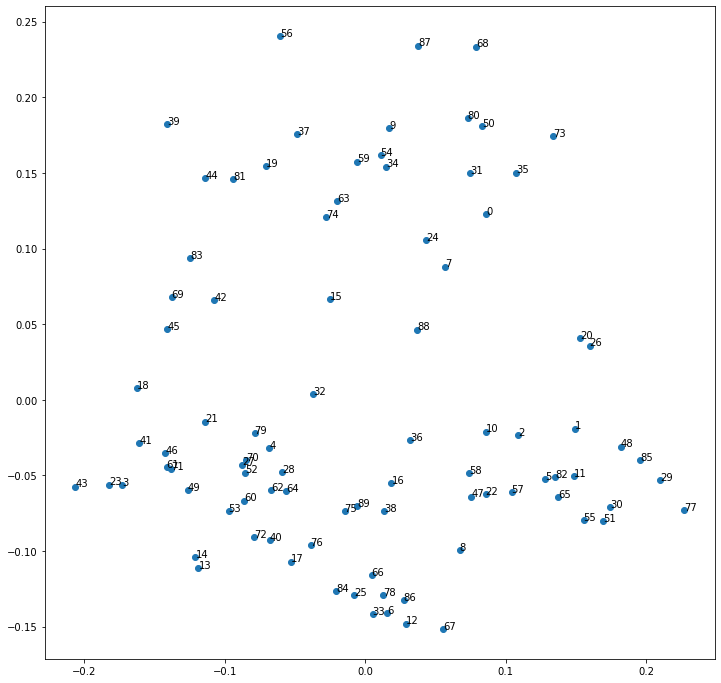

In [4]:
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=17, method='standard')
x_new = embedding.fit_transform(scaled_features)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1])

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

In [5]:
songs[47]

'./data\\51.mp3'

In [6]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_

C:\Dev\anaconda\lib\site-packages\matplotlib\collections.py:1039: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


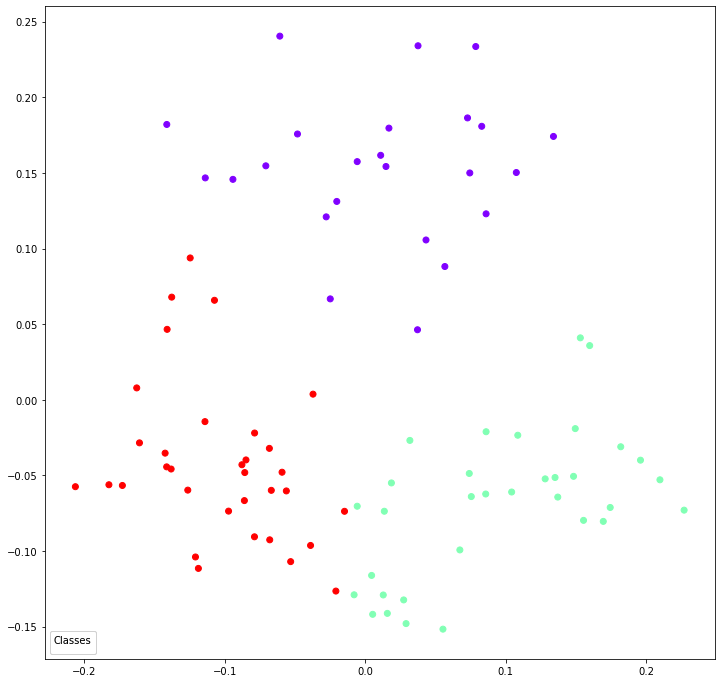

In [7]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [8]:
sample_silhouette_values = silhouette_samples(x_new, clust_labs)
silhouette_avg = silhouette_score(x_new, clust_labs)
silhouette_avg

0.48308000356574127

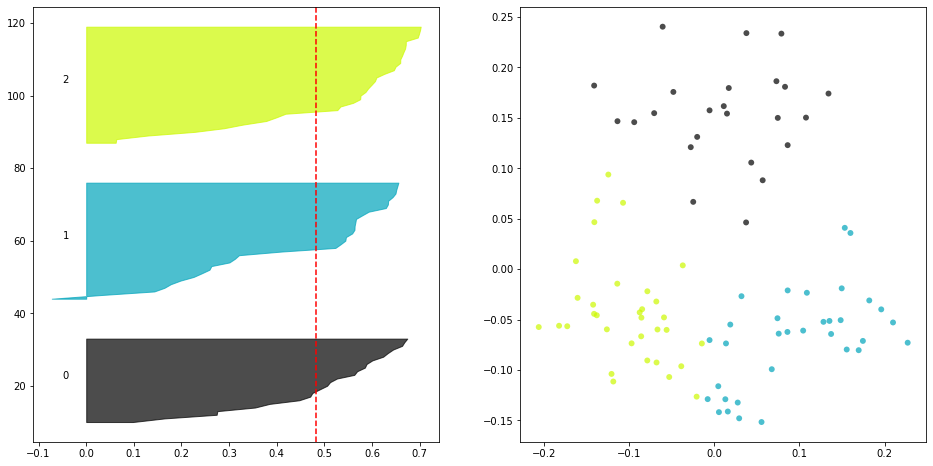

In [9]:
n_clusters = 3
y_lower = 10

fig, ax = plt.subplots(1, 2, figsize = (16, 8))

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clust_labs == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[0].fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10
    
ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

colors=cm.nipy_spectral(clust_labs.astype(float)/n_clusters)
ax[1].scatter(x_new[:,0],x_new[:,1], marker='.', s=140, lw=0, alpha=0.7,c=colors, edgecolor='k')

In [10]:
def fix_order(labs):
    for i in range(2,10):
        temp = labs[(i-1)*10+i]
        labs.pop((i-1)*10+i)
        labs.insert(i, temp)
    return labs

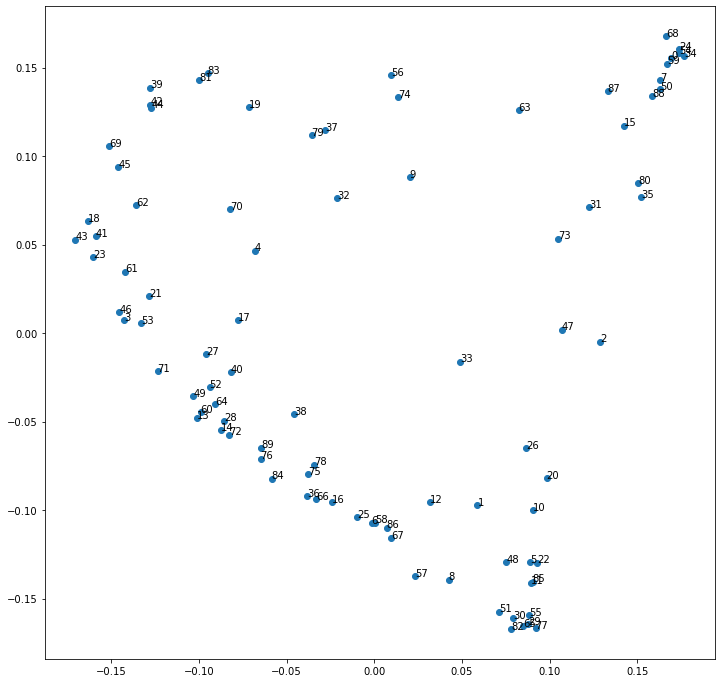

In [11]:
normalized_features = normalize(scaled_features)
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=5, method='standard',random_state=0)
x_new = embedding.fit_transform(normalized_features)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1])

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

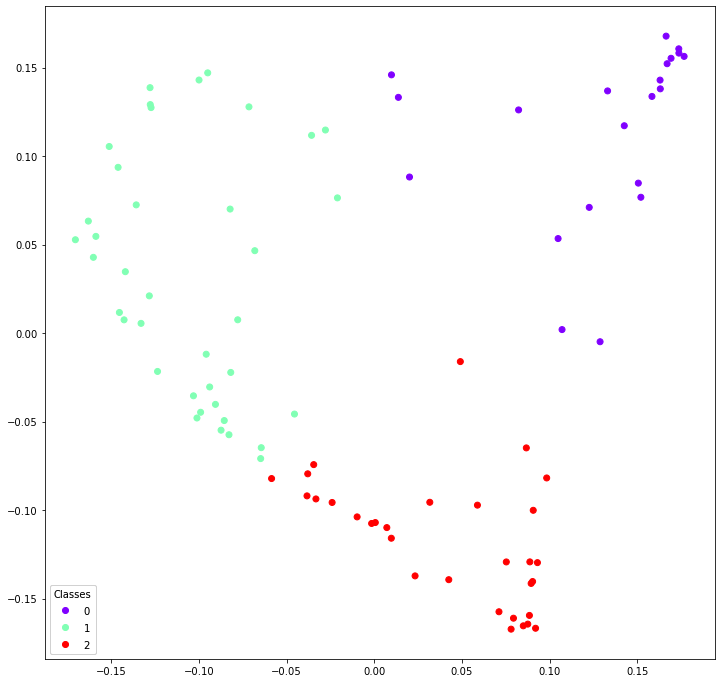

In [12]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

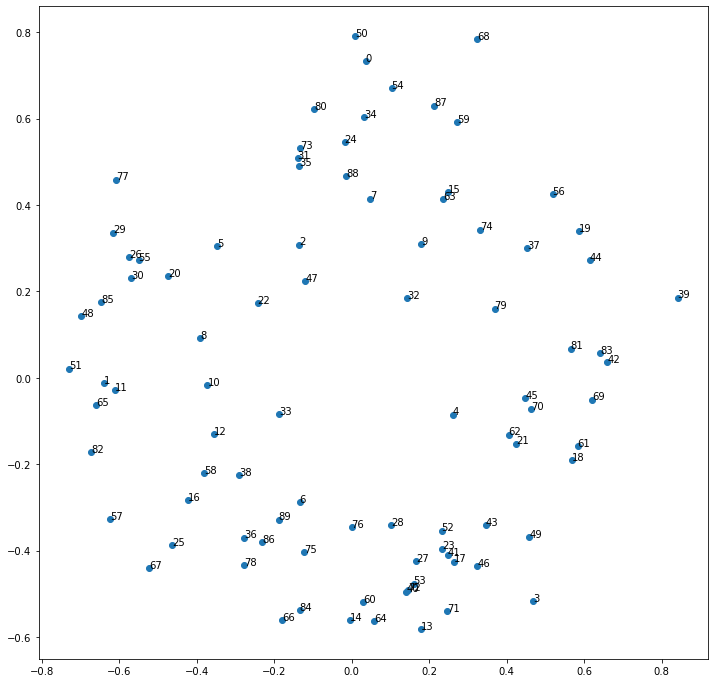

In [13]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)
x_new = pca.fit_transform(normalized_features)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1])

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

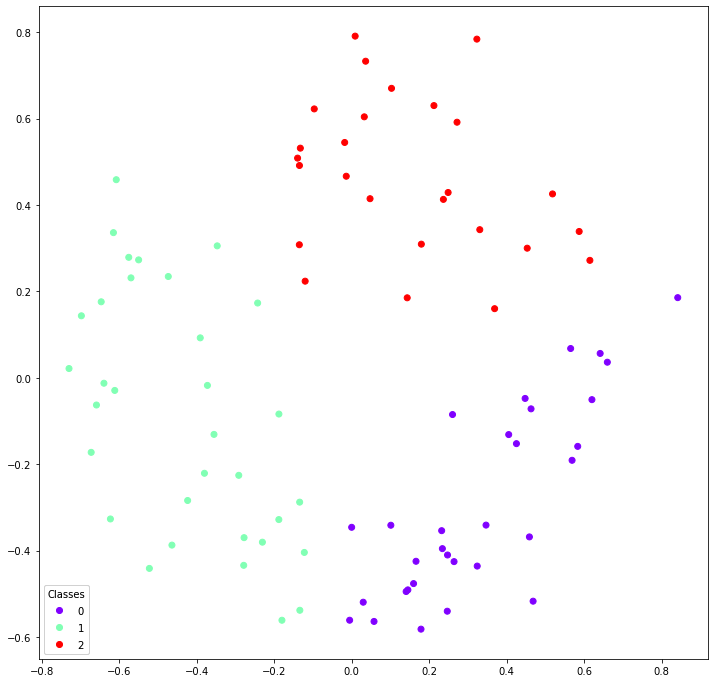

In [14]:
clustering = SpectralClustering(n_clusters=3,
                                random_state=0,
                                assign_labels='kmeans',
                                n_components=3,
                                affinity='nearest_neighbors',
                                n_neighbors=20).fit(normalized_features)
clust_labs=clustering.labels_

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

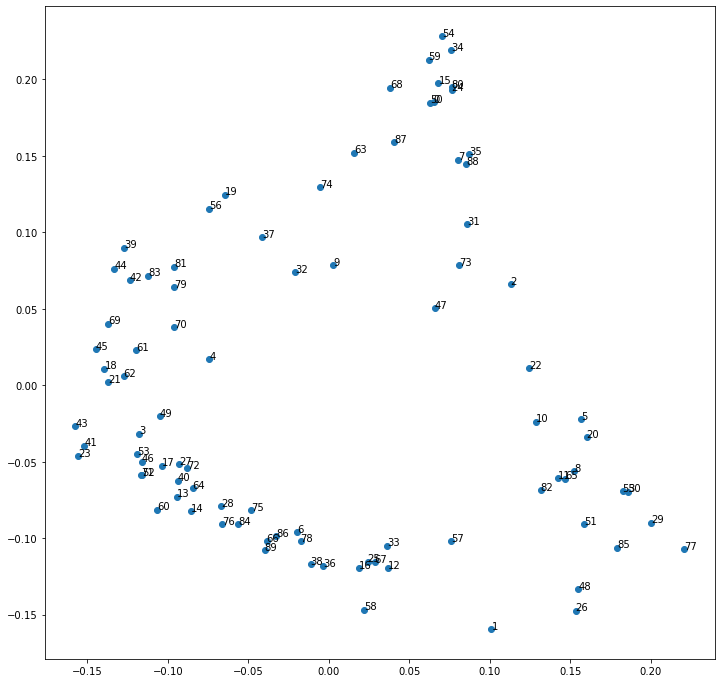

In [15]:
import sklearn.metrics.pairwise as pw

pws = pw.cosine_similarity(scaled_features)

embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=8, method='standard',random_state=0)
x_new = embedding.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1])


for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

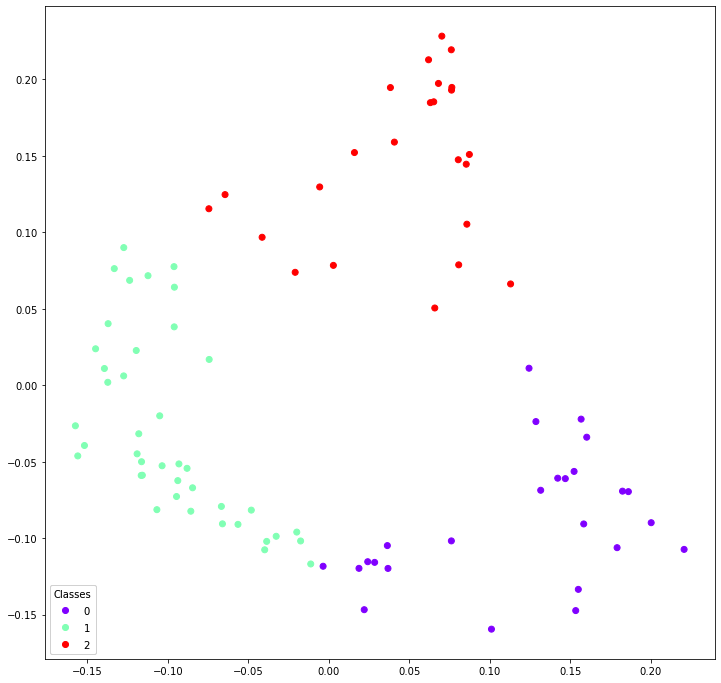

In [16]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [17]:
sample_silhouette_values = silhouette_samples(x_new, clust_labs)
silhouette_avg = silhouette_score(x_new, clust_labs)
silhouette_avg

0.5361717644630629

### With Isomap instead

Text(0.5, 0.98, 'Standardized Data -> Cosine Similarity Matrix -> LLE -> KMeans')

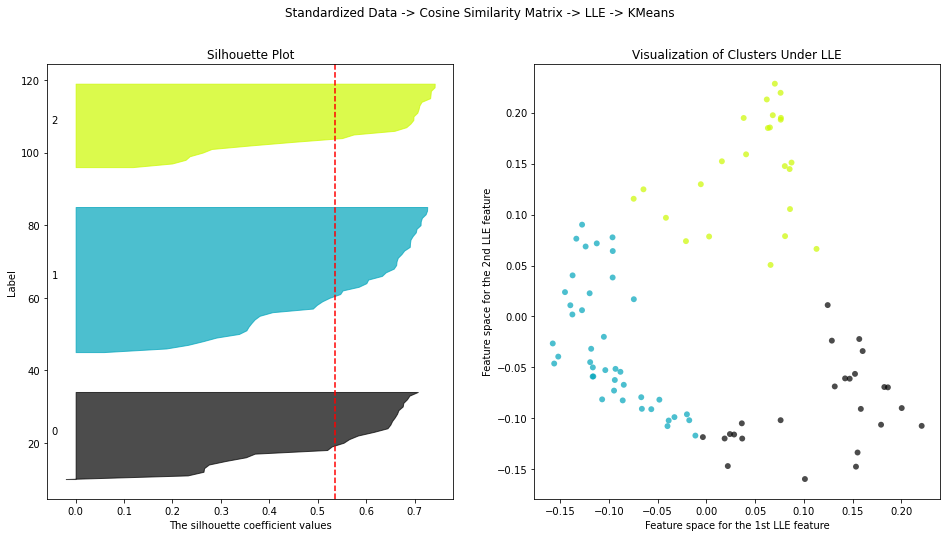

In [18]:
n_clusters = 3
y_lower = 10

fig, ax = plt.subplots(1, 2, figsize = (16, 8))

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clust_labs == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[0].fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10
    
ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

colors=cm.nipy_spectral(clust_labs.astype(float)/n_clusters)
ax[1].scatter(x_new[:,0],x_new[:,1], marker='.', s=140, lw=0, alpha=0.7,c=colors, edgecolor='k')

ax[0].set_title("Silhouette Plot")
ax[0].set_xlabel("The silhouette coefficient values")
ax[0].set_ylabel("Label")
    
ax[1].set_title("Visualization of Clusters Under LLE")
ax[1].set_xlabel("Feature space for the 1st LLE feature")
ax[1].set_ylabel("Feature space for the 2nd LLE feature")

plt.suptitle("Standardized Data -> Cosine Similarity Matrix -> LLE -> KMeans")

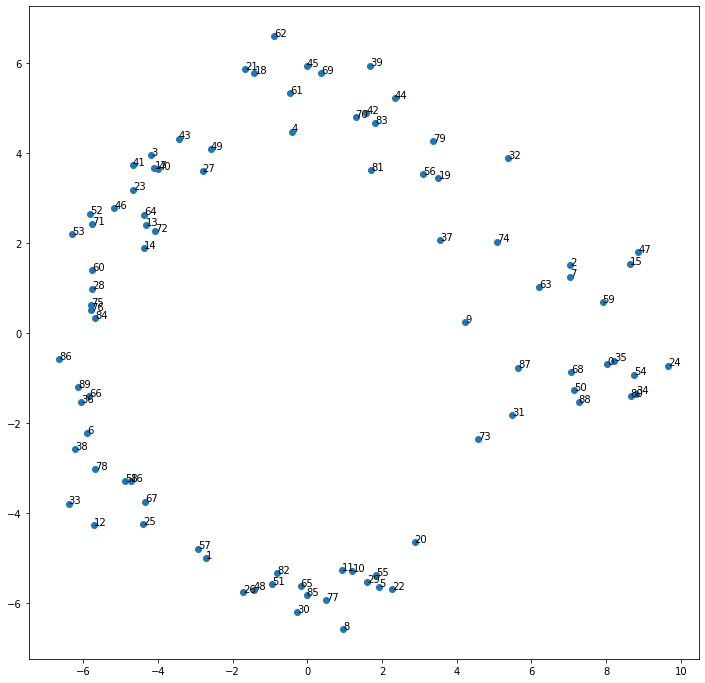

In [27]:
embedding = Isomap(n_components=2, n_neighbors=4)
x_new = embedding.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1])

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

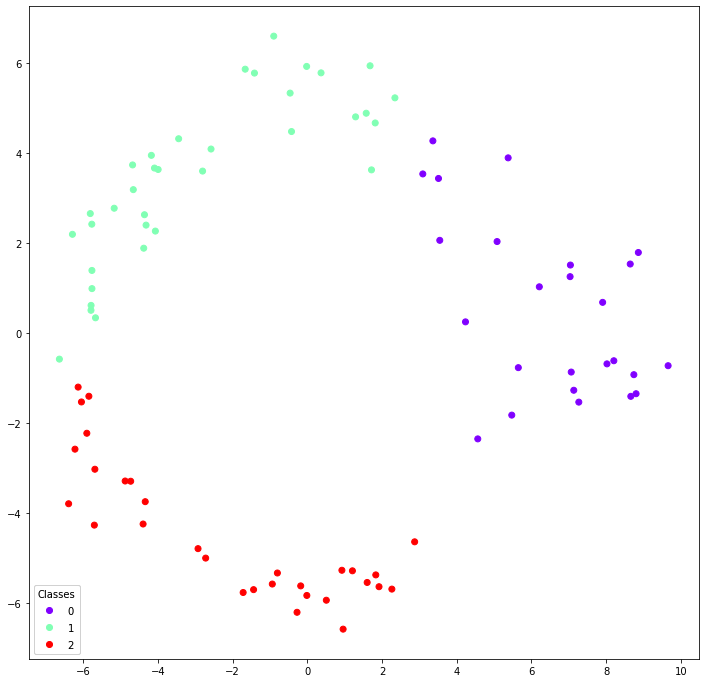

In [43]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [44]:
sample_silhouette_values = silhouette_samples(x_new, clust_labs)
silhouette_avg = silhouette_score(x_new, clust_labs)
silhouette_avg

0.5064992461777256

Text(0.5, 0.98, 'Standardized Data -> Cosine Similarity Matrix -> ISOMAP -> KMeans')

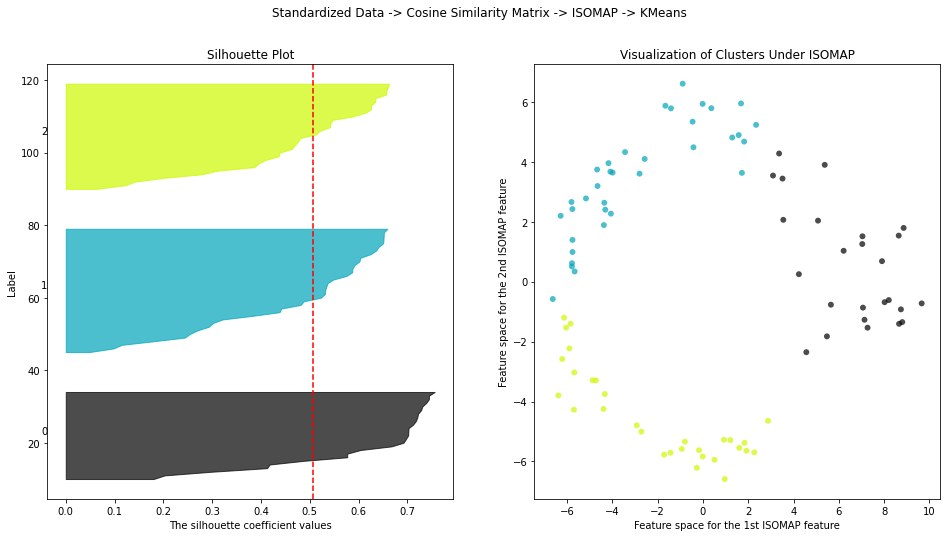

In [45]:
n_clusters = 3
y_lower = 10

fig, ax = plt.subplots(1, 2, figsize = (16, 8))

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clust_labs == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[0].fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10
    
ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

colors=cm.nipy_spectral(clust_labs.astype(float)/n_clusters)
ax[1].scatter(x_new[:,0],x_new[:,1], marker='.', s=140, lw=0, alpha=0.7,c=colors, edgecolor='k')

ax[0].set_title("Silhouette Plot")
ax[0].set_xlabel("The silhouette coefficient values")
ax[0].set_ylabel("Label")
    
ax[1].set_title("Visualization of Clusters Under ISOMAP")
ax[1].set_xlabel("Feature space for the 1st ISOMAP feature")
ax[1].set_ylabel("Feature space for the 2nd ISOMAP feature")

plt.suptitle("Standardized Data -> Cosine Similarity Matrix -> ISOMAP -> KMeans")

### With Spectral Clustering

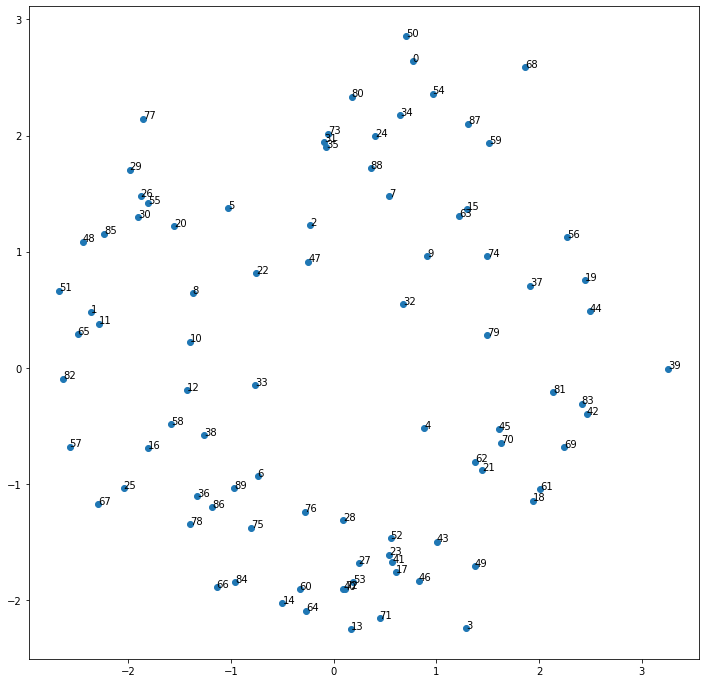

In [70]:
pca = PCA(n_components = 2)
x_new = pca.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1])

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

C:\Dev\anaconda\lib\site-packages\sklearn\cluster\_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


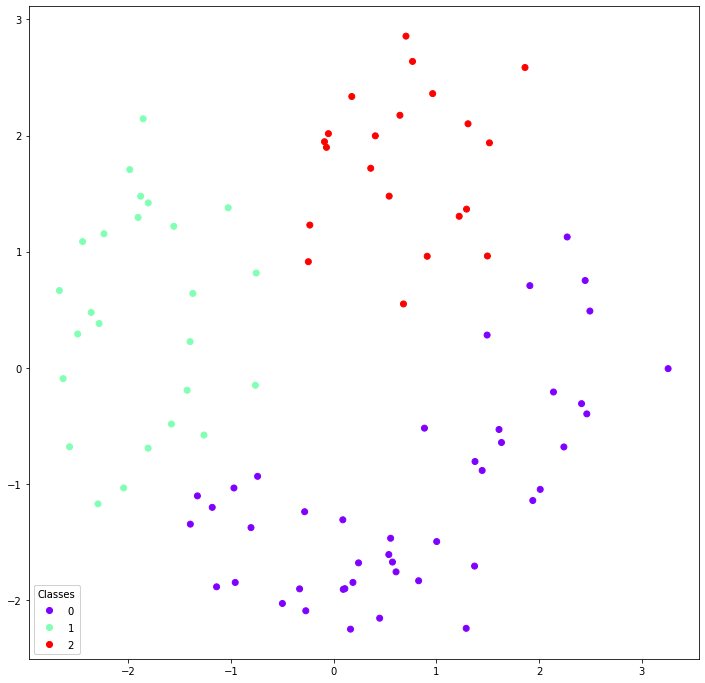

In [71]:
clustering = SpectralClustering(n_clusters=3,
                                random_state=0,
                                assign_labels='kmeans',
                                n_components=3,
                                affinity='rbf',
                                gamma=1).fit(pws)
clust_labs=clustering.labels_

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [72]:
sample_silhouette_values = silhouette_samples(x_new, clust_labs)
silhouette_avg = silhouette_score(x_new, clust_labs, metric='cosine')
silhouette_avg

0.5775525453050393

Text(0.5, 0.98, 'Standardized Data -> Cosine Similarity Matrix -> Gaussian Spectral Clustering')

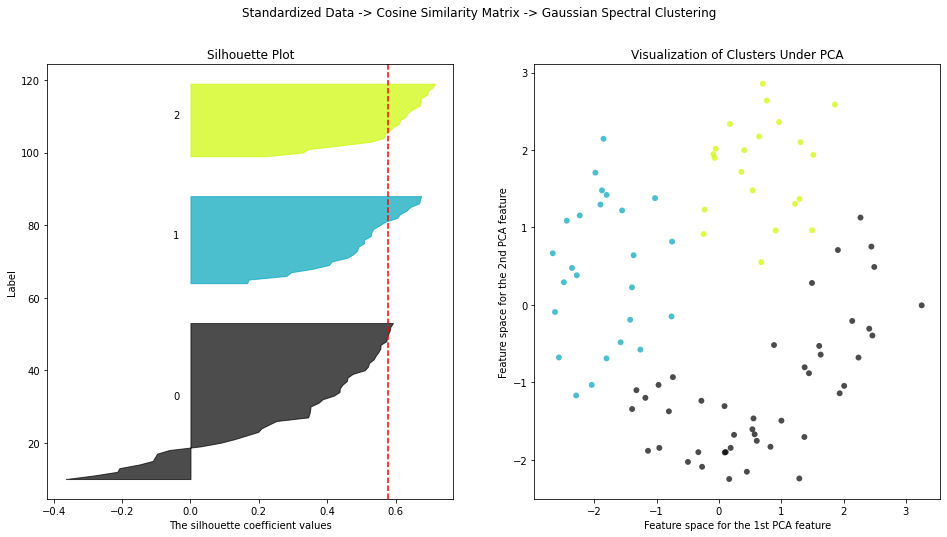

In [76]:
n_clusters = 3
y_lower = 10

fig, ax = plt.subplots(1, 2, figsize = (16, 8))

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clust_labs == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[0].fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10
    
ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

colors=cm.nipy_spectral(clust_labs.astype(float)/n_clusters)
ax[1].scatter(x_new[:,0],x_new[:,1], marker='.', s=140, lw=0, alpha=0.7,c=colors, edgecolor='k')

ax[0].set_title("Silhouette Plot")
ax[0].set_xlabel("The silhouette coefficient values")
ax[0].set_ylabel("Label")
    
ax[1].set_title("Visualization of Clusters Under PCA")
ax[1].set_xlabel("Feature space for the 1st PCA feature")
ax[1].set_ylabel("Feature space for the 2nd PCA feature")

plt.suptitle("Standardized Data -> Cosine Similarity Matrix -> Gaussian Spectral Clustering")

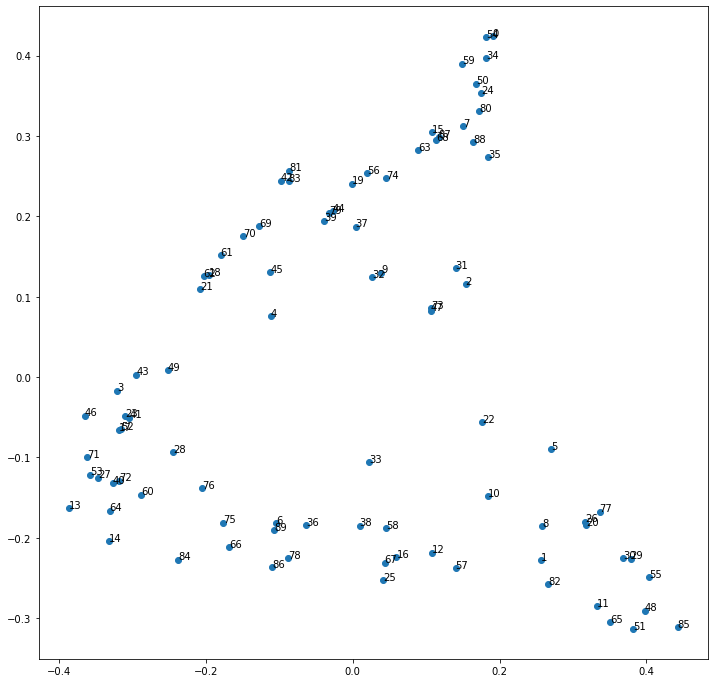

In [78]:
from sklearn.decomposition import KernelPCA 

pca = KernelPCA(n_components=2, kernel='rbf',gamma=0.5)
x_new = pca.fit_transform(pws)

fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1])

for i in range(90):
    ax.annotate(i, (x_new[i,0],x_new[i,1]))

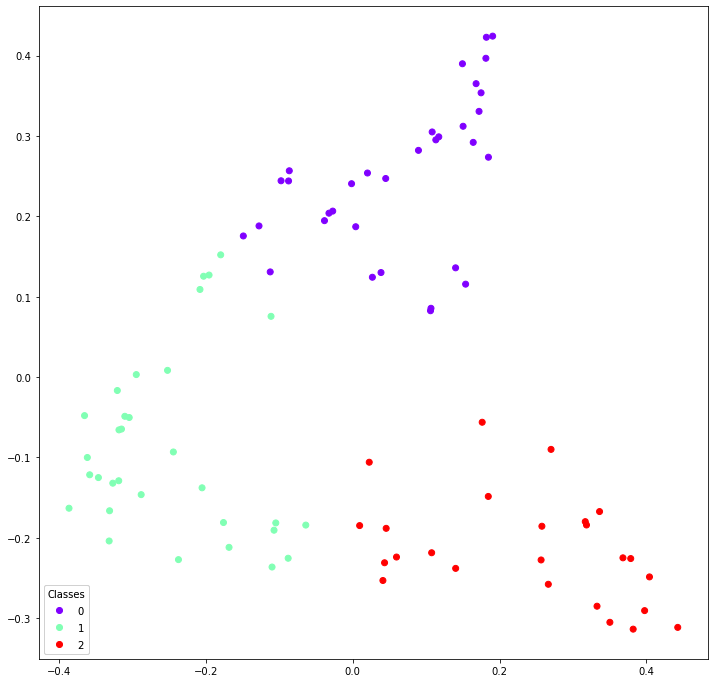

In [79]:
clustering = KMeans(n_clusters=3,random_state=0).fit(x_new)
clust_labs = clustering.labels_
fig, ax = plt.subplots(figsize = (12, 12))
scatter = ax.scatter(x_new[:,0],x_new[:,1], c=clust_labs, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [80]:
sample_silhouette_values = silhouette_samples(x_new, clust_labs)
silhouette_avg = silhouette_score(x_new, clust_labs, metric='cosine')
silhouette_avg

0.7898960199651776

Text(0.5, 0.98, 'Standardized Data -> Cosine Similarity Matrix -> Kernel PCA -> KMeans')

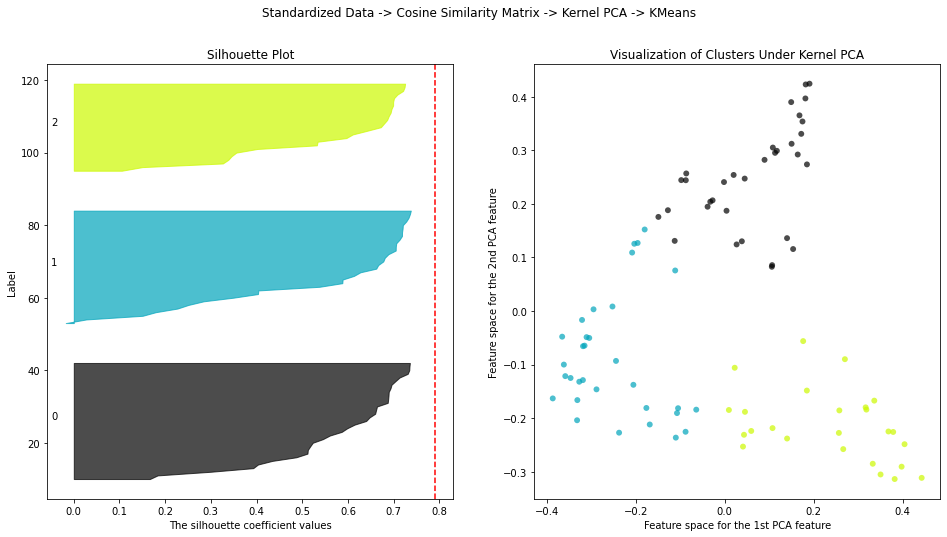

In [85]:
n_clusters = 3
y_lower = 10

fig, ax = plt.subplots(1, 2, figsize = (16, 8))

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clust_labs == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[0].fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10
    
ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

colors=cm.nipy_spectral(clust_labs.astype(float)/n_clusters)
ax[1].scatter(x_new[:,0],x_new[:,1], marker='.', s=140, lw=0, alpha=0.7,c=colors, edgecolor='k')

ax[0].set_title("Silhouette Plot")
ax[0].set_xlabel("The silhouette coefficient values")
ax[0].set_ylabel("Label")
    
ax[1].set_title("Visualization of Clusters Under Kernel PCA")
ax[1].set_xlabel("Feature space for the 1st PCA feature")
ax[1].set_ylabel("Feature space for the 2nd PCA feature")

plt.suptitle("Standardized Data -> Cosine Similarity Matrix -> Kernel PCA -> KMeans")

In [32]:
file_list = os.listdir(os.getcwd()+'/data')
file_list = file_list[0:90]
file_list = fix_order(file_list)
file_list

['0.mp3',
 '1.mp3',
 '2.mp3',
 '3.mp3',
 '4.mp3',
 '5.mp3',
 '6.mp3',
 '7.mp3',
 '8.mp3',
 '9.mp3',
 '10.mp3',
 '11.mp3',
 '12.mp3',
 '13.mp3',
 '14.mp3',
 '15.mp3',
 '16.mp3',
 '17.mp3',
 '18.mp3',
 '19.mp3',
 '20.mp3',
 '21.mp3',
 '22.mp3',
 '23.mp3',
 '24.mp3',
 '25.mp3',
 '26.mp3',
 '27.mp3',
 '28.mp3',
 '29.mp3',
 '30.mp3',
 '31.mp3',
 '32.mp3',
 '33.mp3',
 '34.mp3',
 '35.mp3',
 '36.mp3',
 '37.mp3',
 '38.mp3',
 '39.mp3',
 '40.mp3',
 '41.mp3',
 '42.mp3',
 '43.mp3',
 '44.mp3',
 '45.mp3',
 '46.mp3',
 '47.mp3',
 '48.mp3',
 '49.mp3',
 '50.mp3',
 '51.mp3',
 '52.mp3',
 '53.mp3',
 '54.mp3',
 '55.mp3',
 '56.mp3',
 '57.mp3',
 '58.mp3',
 '59.mp3',
 '60.mp3',
 '61.mp3',
 '62.mp3',
 '63.mp3',
 '64.mp3',
 '65.mp3',
 '66.mp3',
 '67.mp3',
 '68.mp3',
 '69.mp3',
 '70.mp3',
 '71.mp3',
 '72.mp3',
 '73.mp3',
 '74.mp3',
 '75.mp3',
 '76.mp3',
 '77.mp3',
 '78.mp3',
 '79.mp3',
 '80.mp3',
 '81.mp3',
 '82.mp3',
 '83.mp3',
 '84.mp3',
 '85.mp3',
 '86.mp3',
 '87.mp3',
 '88.mp3',
 '89.mp3']

In [74]:
reordered_labs = clust_labs.tolist()
reordered_labs = fix_order(reordered_labs)
reordered_labs

[2,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 2]

# Submission to leaderboard

You will get feedback of your clustering result by submitting to the leaderboard. Each team will have 10 chances. Please submit a submission log as an appendix in your final report, which should record your ari score (leadboard feedback), and your improvement plan (in bullet points, keep it concise) between two submissions.

There are two types of submissions.

### Stage Submission

Each group can submit your results up to ten times. You will only get the range of your ari scores to have a rough check of your clusters. This is by no means a supervised learning project. So your goal shouldn't be to improve this ari score. It only serves as an indicator whether you need to work harder to improve your clustering scheme.

### Final Submission

You can only run the final submission once! It is when you finished all the writing and everything is finalized. Change isFinal = 'yes' then run this cell. You must keep the succesfull message from the server when you submit your jupyter notebook. Once you made the final submission, the server will not accept any further submission of any kind.

In [82]:
#labels = list(range(90)) 
#vsID = "10730143x"  
#URL = "https://wfirmplh0g.execute-api.us-west-1.amazonaws.com/leaderboard/ari"
#isFinal = 'no'

# 1. put your clustering result in labels;
#  if you have k clusters, the labels should be a vector of elements taking values
#  from 0~ k-1, there must not have a cluster with no members.
# 2. put your group ID as a string in vsID, it is unique for each group
# 3. change the URL to the URL that will be published on Canvas.
# 4. To make your final submission, change isFinal to 'yes'

### Do not change any code except the following block
### your code starts here

#labels = reordered_labs

### your code ends here


#import requests
#import json
#submission = {}
#submission['vsID'] = vsID
#submission['labels'] = ",".join( [ str( int(x)) for x in labels   ])
#submission['isFinal'] = isFinal
#r = requests.get(url = URL, params = submission)

#print(r.json()['body'])

# <font color= "blue"> Submission Instructions</font>

1. Change the isFinal variable to be 'yes' in the submission to leaderboard cell, run it just once to get submission sucessful message.
2. Select File -> Download as -> PDF via LaTeX
3. Submit your PDF on Gradescope. There should be three different parts to submit on gradescope, the report pdf file, jupyter notebook pdf file and the methodology pdf file.
4. Pack all the relevant files (you can save your features in a different file, feature.csv) into a zipfile yourGroupNumber.zip (group1.zip for example) and upload it to Canvas.